#### Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import csv file
data = pd.read_csv('C:/Users/Aylan/Documents/IT/AIML/Supervised learning/Project Supervised Learning - Personal Loan Campaign Modelling/Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
# display data type of each column
data.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
# display info and data type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# display the data.describe() and the five number summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


the dataset has 5000 rows and 14 columns. CCAvg column is a float data type column, the rest of the columns are integer data type columns. In addition, no column is missing in the statisitical summary table, that means every column is recongnized as numeric column. However, from the describe() function, we can see that the minimum value is -3 in the "Experience" column.The minimum years of experience cannot be negative. We need to see how many rows have negative values in the "Experience" column.

In [6]:
df_exp = data[data['Experience'] < 0]
df_exp['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [7]:
# there are three negative values in the "Experience" column: -1, -2, -3
# display how many of these values there are in the column
len(df_exp['Experience'])

52

In [8]:
# we have 52 negative values in the "Experience" column
# the most convenient way to deal with this issue is to replace the negative values with the median
# first, replace negative values with NaN
data = data.replace(-1, np.nan)
data = data.replace(-2, np.nan)
data = data.replace(-3, np.nan)
data.isnull().any()

ID                    False
Age                   False
Experience             True
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [9]:
# negative values in the "Experience" column replaced with NaN values
# replace the missing values with the median
data.median()

ID                     2500.5
Age                      45.0
Experience               20.0
Income                   64.0
ZIP Code              93437.0
Family                    2.0
CCAvg                     1.5
Education                 2.0
Mortgage                  0.0
Personal Loan             0.0
Securities Account        0.0
CD Account                0.0
Online                    1.0
CreditCard                0.0
dtype: float64

In [10]:
data.fillna(data.median(), inplace=True)
data.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [11]:
data.describe().T
# we can see from the table below that the minimum experience year is zero now

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [12]:
# display shape of dataset
data.shape

(5000, 14)

In [13]:
# find null values if any
data.isnull().any()
# the data set has no missing values

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

#### Study the data distribution in each attribute and target variable.

In [14]:
# find number of unique in each column
data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [15]:
# find number of people with zero mortgage
data[data['Mortgage'] == 0].shape[0]
# the number of people with zero mortgage is 3462

3462

In [16]:
# find number of people with zero credit card spending per month
data[data['CCAvg'] == 0].shape[0]
# the number of people with zero credit card spending is 106

106

In [17]:
# from the dataset, we can notice that some peope spend money with zero credit cards associated to them
# hence, if we want to focus only on people who have a credit card we'll get a different number
data[(data['CCAvg'] == 0) & (data['CreditCard'] == 1)].shape[0]
# in this case the number of people with zero credit card spending per month is 28

28

In [18]:
# value counts of all categorical columns
# the columns to be considered as categorical in my opinion are:
# "Family", "Personal Loan", "Securities Account", "CD Account", "Online", "CreditCard"
# value counts of "Family" column
data['Family'].value_counts(normalize=True).to_frame()

,Family
1,0.2944
2,0.2592
4,0.2444
3,0.2020


In [19]:
# value counts of "Personal Loan" column
data['Personal Loan'].value_counts(normalize=True).to_frame()

,Personal Loan
0,0.904
1,0.096


In [20]:
# value counts of "Securities Account" column
data['Securities Account'].value_counts(normalize=True).to_frame()

,Securities Account
0,0.8956
1,0.1044


In [21]:
# value counts of "CD Account" column
data['CD Account'].value_counts(normalize=True).to_frame()

,CD Account
0,0.9396
1,0.0604


In [22]:
# value counts of "Online" column
data['Online'].value_counts(normalize=True).to_frame()

,Online
1,0.5968
0,0.4032


In [23]:
# value counts of "CreditCard" column
data['CreditCard'].value_counts(normalize=True).to_frame()

,CreditCard
0,0.706
1,0.294


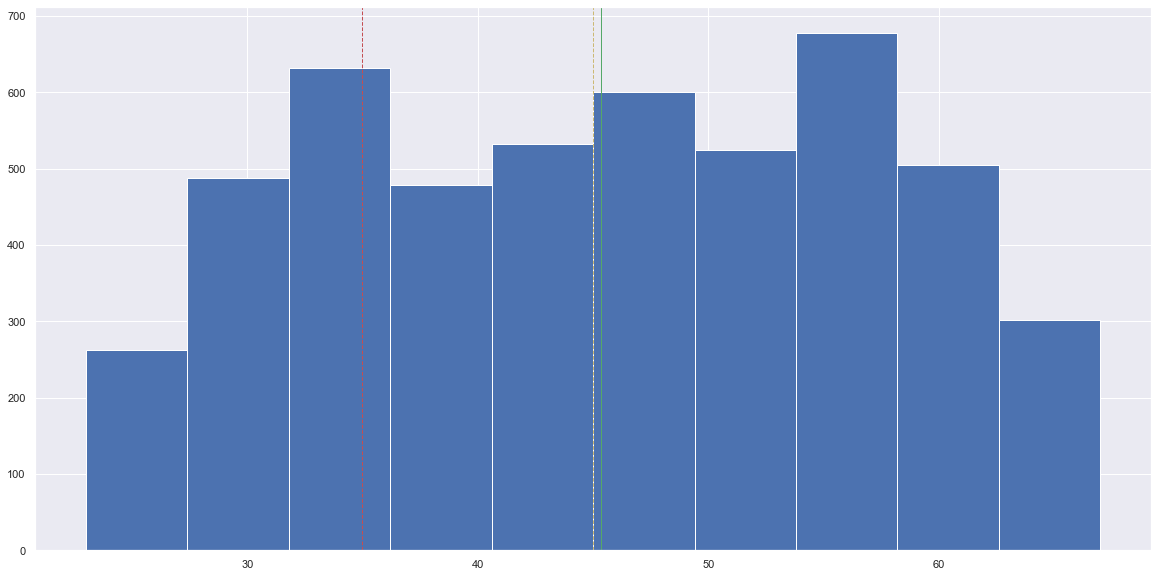

In [24]:
# univariate
# univariate analysis refers to the study or analysis of a single variable
# we will conduct analysis on a single variable at a time to check their distribution
# the variables we can check are: "Age", "Experience", "Income" and "CCAvg"
# let's start with age
df_age = data['Age']
plt.figure(figsize=(20,10))
plt.hist(df_age, color='b')
plt.axvline(df_age.mean(), color='g', linewidth=1)
plt.axvline(df_age.median(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_age.mode()[0], color='r', linestyle='dashed', linewidth=1)

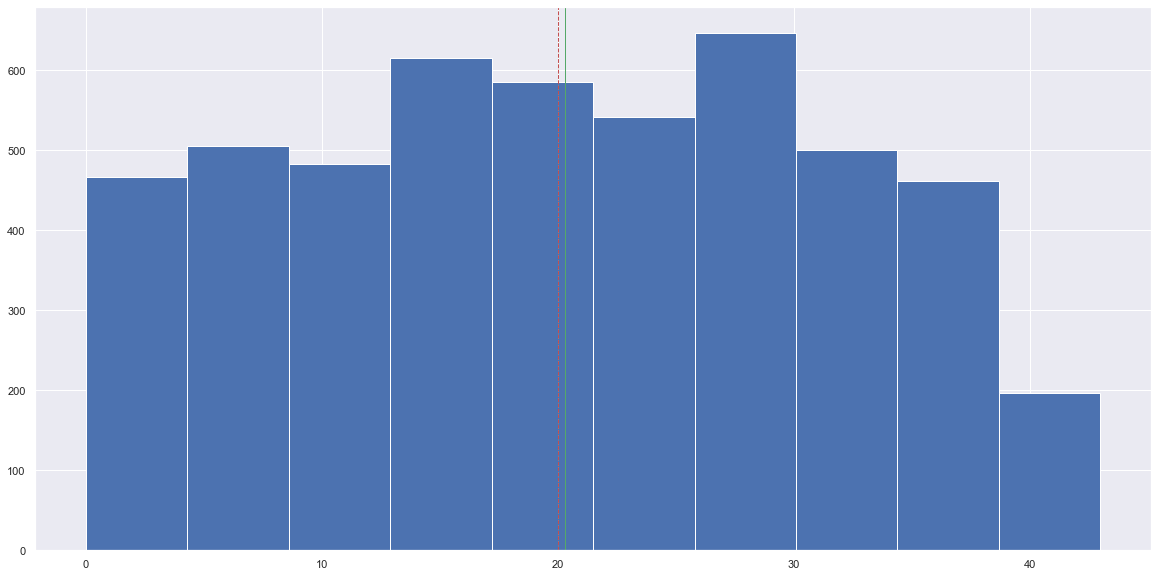

In [25]:
# univariate analysis: Experience
df_experience = data['Experience']
plt.figure(figsize=(20,10))
plt.hist(df_experience, color='b')
plt.axvline(df_experience.mean(), color='g', linewidth=1)
plt.axvline(df_experience.median(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_experience.mode()[0], color='r', linestyle='dashed', linewidth=1)

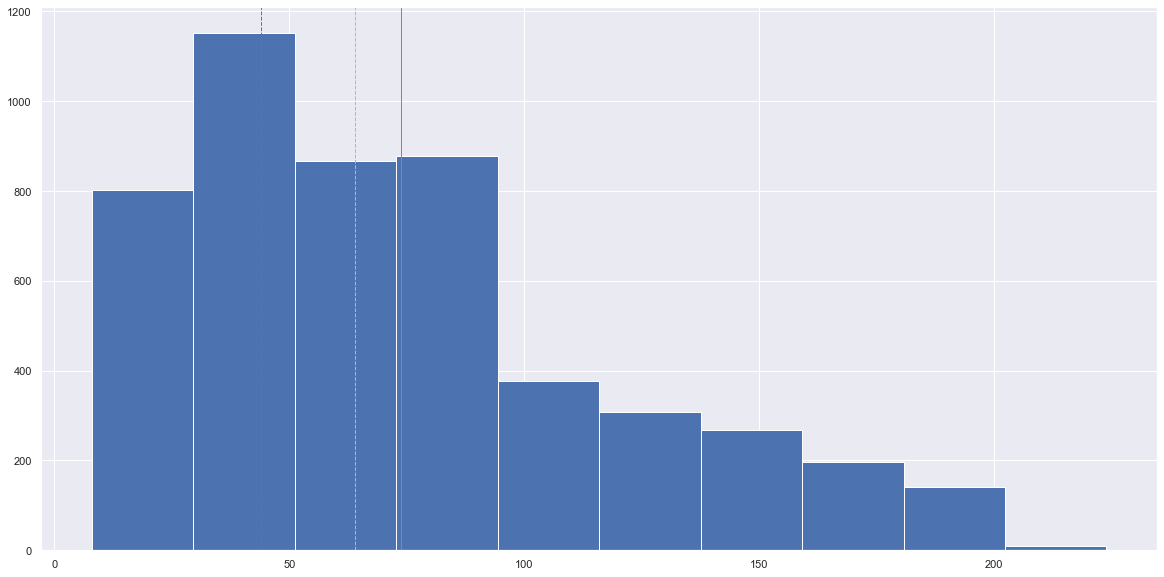

In [26]:
# univariate analysis: Income
df_income = data['Income']
plt.figure(figsize=(20,10))
plt.hist(df_income, color='b')
plt.axvline(df_income.mean(), color='g', linewidth=1)
plt.axvline(df_income.median(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_income.mode()[0], color='r', linestyle='dashed', linewidth=1)

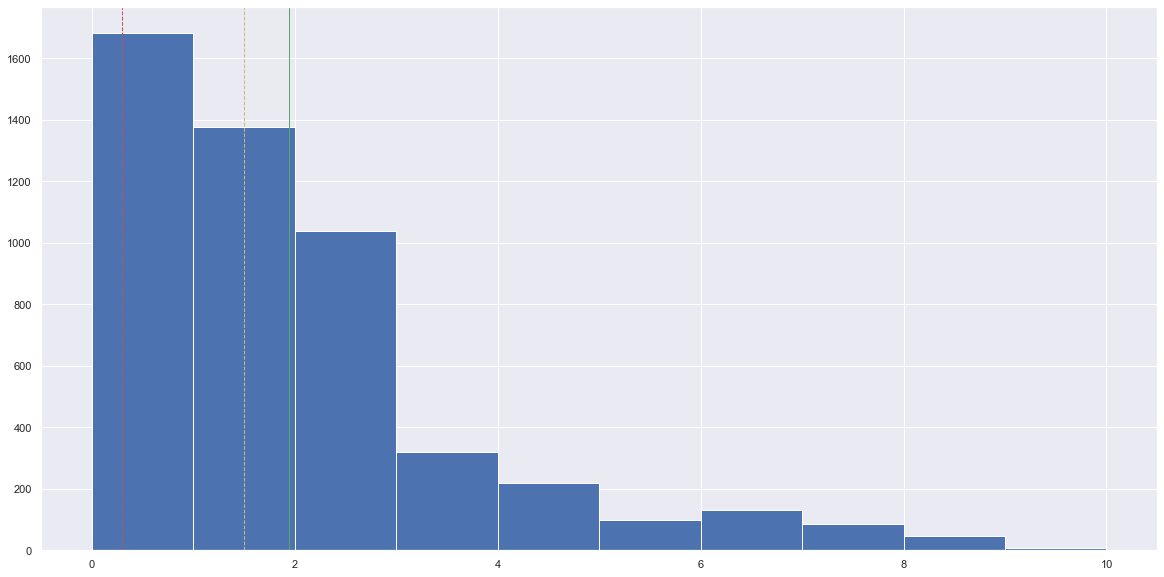

In [27]:
# univariate analysis: CCAvg
df_CCAvg = data['CCAvg']
plt.figure(figsize=(20,10))
plt.hist(df_CCAvg, color='b')
plt.axvline(df_CCAvg.mean(), color='g', linewidth=1)
plt.axvline(df_CCAvg.median(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(df_CCAvg.mode()[0], color='r', linestyle='dashed', linewidth=1)

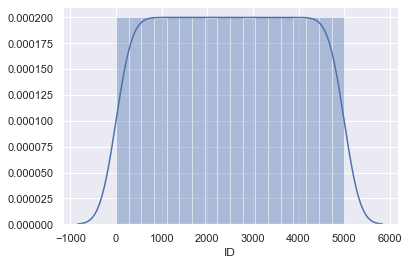

In [28]:
# we can use the distplot function from the seaborn library to visualize the data distrubution for the rest of the columns
sns.distplot(data['ID'])
# it's a uniform distribution

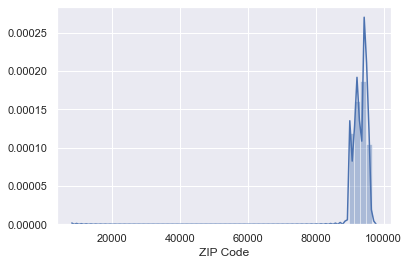

In [29]:
sns.distplot(data['ZIP Code'])

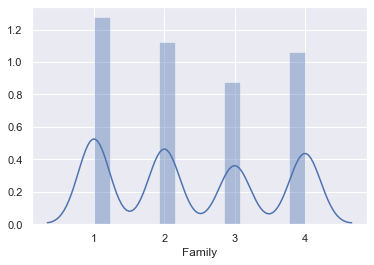

In [30]:
sns.distplot(data['Family'])

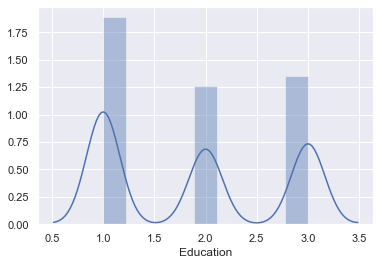

In [31]:
sns.distplot(data['Education'])

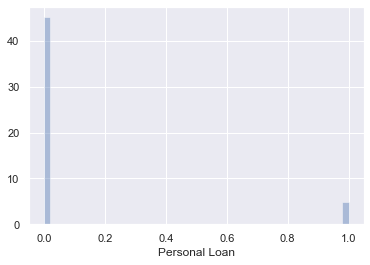

In [32]:
sns.distplot(data['Personal Loan'])

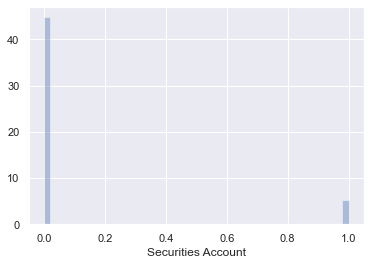

In [33]:
sns.distplot(data['Securities Account'])

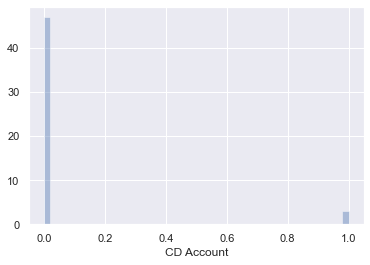

In [34]:
sns.distplot(data['CD Account'])

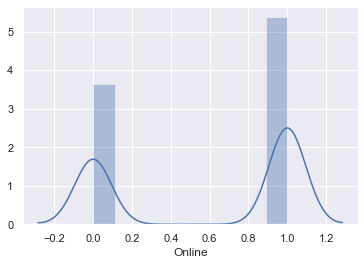

In [35]:
sns.distplot(data['Online'])
# number of customers with online accounts is greater than number of customers without online accounts

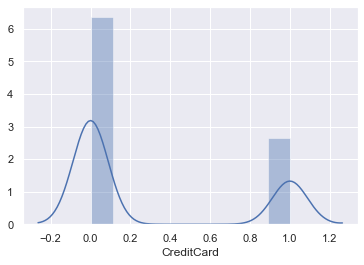

In [36]:
sns.distplot(data['CreditCard'])
# number of customers without credit cards is greater than number of customers without credit cards

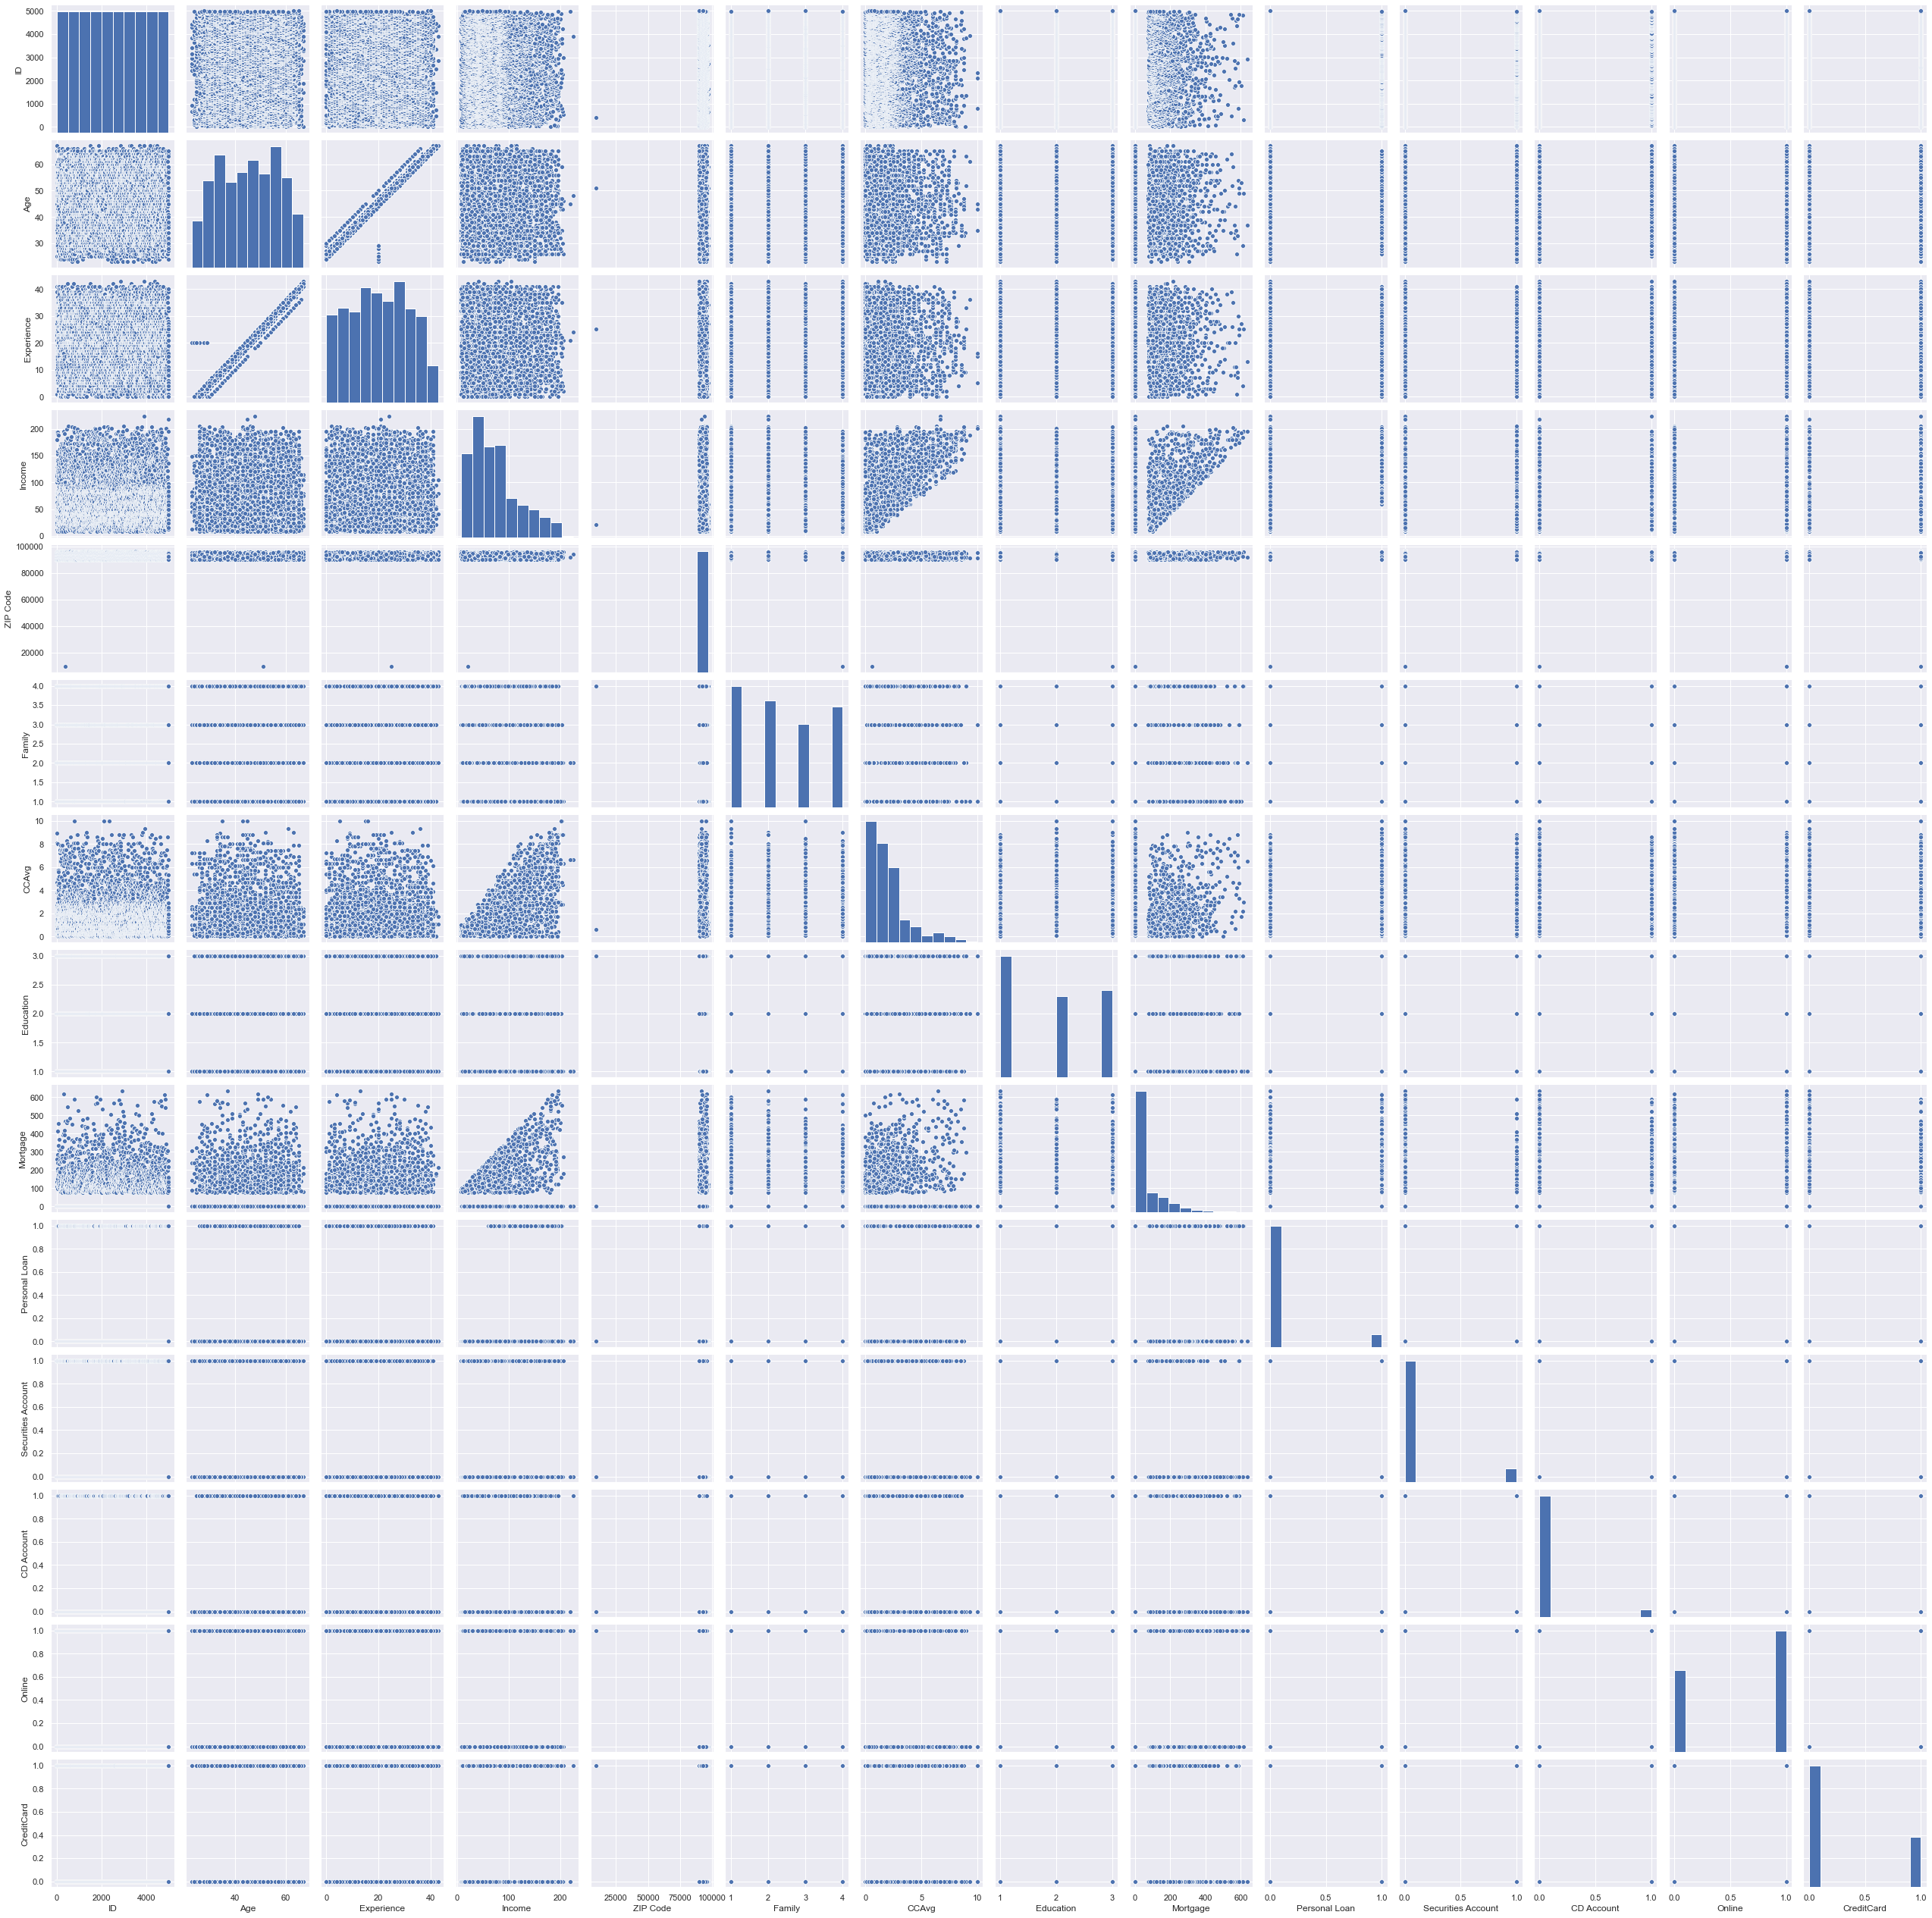

In [37]:
# bivariate analysis
# we can use a scatter plot to show the relationship between any two columns
sns.pairplot(data)

from the plot above, we can clearly see a positive correlation between experience and age.

#### Split the data into training and test set in the ratio of 70:30 respectively

In [38]:
# let's get our model ready
X = data.drop(['Personal Loan'], axis=1)
y = data['Personal Loan']
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,1335,47,22.0,35,94304,2,1.3,1,0,0,0,1,0
4768,4769,38,14.0,39,93118,1,2.0,2,0,0,0,1,0
65,66,59,35.0,131,91360,1,3.8,1,0,0,0,1,1
177,178,29,3.0,65,94132,4,1.8,2,244,0,0,0,0
4489,4490,39,13.0,21,95518,3,0.2,2,0,0,0,1,0


In [39]:
# check split of data
print("{0:0.2f}% data is in training set".format((len(X_train) / len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test) / len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


#### Use the Logistic Regression model to predict whether the customer will take a personal loan or not.

In [40]:
# build logistic model
model = LogisticRegression()
model.fit(X_train, y_train)
# predict on test
y_predict = model.predict(X_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0        1       2         3         4         5         6        7  \
0  0.000017  0.00227 -0.0521  0.034356 -0.000063  0.142217  0.079724  0.15384   

          8         9        10        11        12  intercept  
0  0.000536  0.004975  0.043088 -0.001747 -0.000631  -0.000981  


In [41]:
# print all the metrics related to evaluating the model performance
print('Training accuracy:', model.score(X_train, y_train), '\n')
print('Test accuracy:', model.score(X_test, y_test), '\n')
#print('Confusion Matrix')
#print(draw_cm(y_test,y_predict))
print('Recall:', metrics.recall_score(y_test, y_predict), '\n')
print('Precision:', metrics.precision_score(y_test, y_predict), '\n')
print('F1 score:', metrics.f1_score(y_test, y_predict), '\n')
print('Roc Auc Score:', metrics.roc_auc_score(y_test, y_predict), '\n')

Training accuracy: 0.9102857142857143 

Test accuracy: 0.9093333333333333 

Recall: 0.3087248322147651 

Precision: 0.5822784810126582 

F1 score: 0.40350877192982454 

Roc Auc Score: 0.6421492406817719 



In [42]:
# draw a heatmap to display confusion matrix
# function to get confusion matrix
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Confusion Matrix


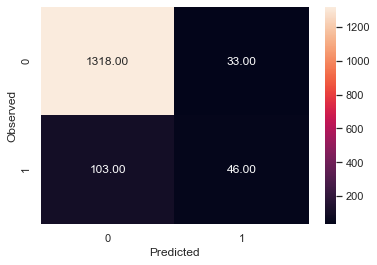

None


In [43]:
print('Confusion Matrix')
print(draw_cm(y_test, y_predict))

#### Find out coefficients of all the attributes and show the output in a data frame with column names

In [44]:
df = pd.DataFrame()
df['Col'] = X_train.columns
df['Coeff'] = np.round(abs(model.coef_[0]),2)
df.sort_values(by='Coeff',ascending=False)

,Col,Coeff
7,Education,0.15
5,Family,0.14
6,CCAvg,0.08
2,Experience,0.05
10,CD Account,0.04
3,Income,0.03
0,ID,0.00
1,Age,0.00
4,ZIP Code,0.00
8,Mortgage,0.00


#### Conclusion related to the Business understanding of the model

Confusion matrix:

- TP: True Positives(observed=1, predicted=1): we correctly predicted that the customers will take a personal loan.
- TN: True Negatives(observed=0, predicted=0): we correctly predicted that the customers won't take a personal loan.
- TN: False Positives(observed=0, predicted=1): we incorrectly predicted that the customers will take a personal loan.
- FN: False Negatives(observed=1, predicted=0): we incorrectly predicted that the customers won't take a personal loan.